<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/DSACAN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN iris 데이터 세트에 적용하기

In [0]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

feature_names = ['sepal_length', 'sepal_width' ,'petal_length', 'petal_width']
iris = load_iris()

irisDF = pd.DataFrame(data = iris.data , columns = feature_names)
irisDF['target'] = iris.target

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/')

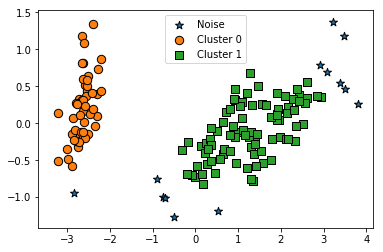

In [14]:
from sklearn.decomposition import PCA
from importme import vsp

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1']  = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1 ]

vsp.visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter= False)